# Perturbation Theory

* **Author:**

* **Date:**

* **Time spent on this assignment:**

## Basic instructions

* you can copy this notebook to your Google Colab account (icon at the top of this page; please use your UIUC account!) and work there.
* you may also work locally on your own computer if you prefer by downloading the `.ipynb` file (also an icon on top of this page).
* Ask for help in office hours or on Campuswire.
* To submit your work:
  * Make sure you answer all interpretation questions! Those will be taken into account for the grading.
  * Convert the notebook to a good-quality PDF (see notes at the bottom)
  * Submission will be on gradescope.

In [2]:
import numpy as np
from functools import partial
import pylab as plt
import scipy
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy.polynomial.hermite as Herm
import math
import scipy.optimize
from functools import partial
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import matplotlib.animation as animation
from IPython.display import HTML
def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['FuncAnimation','Herm','HTML','resetMe','scipy','np','plt','math','jax','jnp','jit','grad','HTML','animation','animateMe_singlePendula','partial','pyscf','MaxNLocator']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    plt.rcParams.update({"font.size": 14})
    return
resetMe()
import datetime;datetime.datetime.now()

datetime.datetime(2025, 3, 12, 23, 51, 6, 641569)

## Exercise 1.  Two Particles in a one-dimensional Harmonic Oscillator

So far we've looked at the interaction of a single particle in a one-dimensional Harmonic oscillator potential.  In this exercise, we are going to go beyond this and look at two distinguishable particles in a Harmonic oscillator potential.   We are going to start by assuming those particles are not interacting and then we are going to introduce a repulsive interaction between them.  

Suppose we can represent the wave-function for a single particle as  $\phi_a(x)$ or $\phi_b(x)$, then the wave-function for two (non-interacting) particles can be represented as a product of any of the single-particle wave-functions - an example two-particle wave-function might be something like

$$\Psi(x_1,x_2) = \phi_a(x_1)\phi_a(x_2)$$

or it could be

$$\Psi(x_1,x_2) = \phi_b(x_1)\phi_a(x_2)$$

Previously on a computer, we were able to represent the single-particle wave-functions as a vector `phi_a` or `phi_b` that was the length of our grid (say 200 points).  To represent the two particle wave-function, we can represent it by a vector of  length $200^2$ points - we need an amplitude for every possible value of $x_1$ and $x_2$.  To get that vector, we need to use a linear-algebra tool called the Kronecker product.  For this last example, we would have  `Psi=np.kron(phi_b,phi_a)`.

It is important to realize that that is very different from just multiplying the two wavefuctions!
Without interactions, the two particles live in their own, separate Hilbert spaces.
In Dirac notation, the same would be written as

$$\ket{\Psi} = \ket{\phi_a}\otimes\ket{\phi_b}$$

where $\otimes$ is the Kronecker product.




## a.  A two particle wave-function

Suppose we are working on grid
```
L=20
xs = np.linspace(-L/2,L/2,200)
```

We then might have a one-particle wave-function `phi_a=np.cos(xs*2*np.pi/L)` and another one particle wave-function `phi_b=np.cos(xs*4*np.pi/L)`

Go ahead and
* plot these two wave-functions $\phi_a$ and $\phi_b$.
* make the vector for the wave-function $\Psi(x_1,x_2)= \phi_a(x_1)\phi_b(x_2)$
* Verify this new vector is of length $200$^2

As a reminder on the numerical tools we are using:
* our preferred tool for plotting functions is [matplotlib](https://matplotlib.org/stable/).
* For plotting simple functions, we can use the [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function.
* Any function from the `np` domain is part or [numpy](https://numpy.org/doc/stable/)
* Both matplotlib and numpy have evolved into de-fact standard and daily-use tools for physicists. They come with excellent online documentation. Consult it often when running into problems with syntax or if you struggle to understand any functionality.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

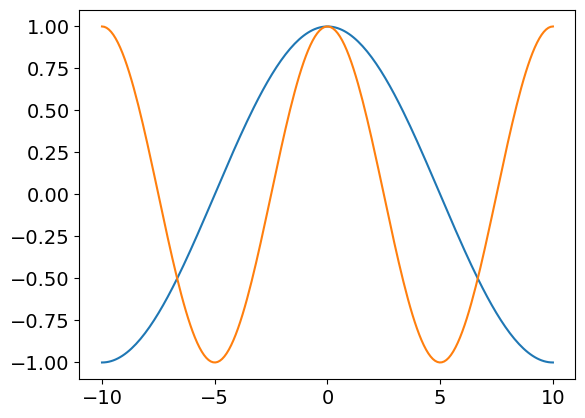

(40000,)


In [3]:
###ANSWER HERE
L=20
xs = np.linspace(-L/2,L/2,200)
phi_a=np.cos(xs*2*np.pi/L)
phi_b=np.cos(xs*4*np.pi/L)
plt.plot(xs,phi_a)
plt.plot(xs,phi_b)
plt.show()
Psi=np.kron(phi_a,phi_b)
print(Psi.shape)

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

We now want to plot our wave-function $\Psi(x_1,x_2)$.  To do this, we want to put $x_1$ on the x-axis and $x_2$ on the y-axis.  Then we can use contours or height to represent the amplitude of the joint wavefunction. This can be used to infer the probability of simultaneously having one particle at $x_1$ and another at $x_2$ (which is of course $|\Psi(x_1, x_2)|^2$ -- feel free to plot that as well. Use `np.abs` to get the absolute of the wavefunction).  
For example, the diagonal of your plot ($x=y$) is showing you how likely the two particles are for being on top of each other.

We can set up this plot using
```
def Plot2d_help(xs,ys,Z,plot_3d=False):
    X, Y = np.meshgrid(xs, ys)
    Z = Z.reshape((len(xs),len(ys)))
    if plot_3d==True:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, Z, cmap='viridis')
        plt.show()
    else:
        plt.contourf(X, Y, Z, cmap='viridis')
        plt.axis('equal')
        plt.colorbar()
        plt.xlim(-5,5)
        plt.ylim(-5,5)
        plt.show()
    return

Plot2d = partial(Plot2d_help,x_s,x_s)
```

and then calling

```
Plot2d(Psi,plot_3d=False)
```

Go ahead and plot your two particle wave-function that you've produced above. (you can also check what happens when you set `plot_3d=True`).

**Think about why the result you are getting is reasonable. Write a short note in a separate text or markdown cell in which you interpret the plot, and reason why (or why not) it makes sense from what you know about the physics of the problem.**

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

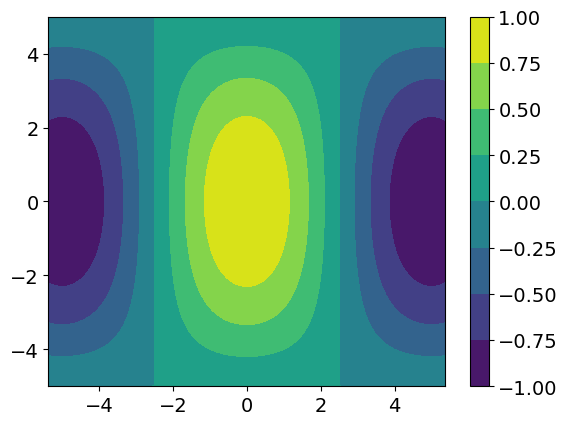

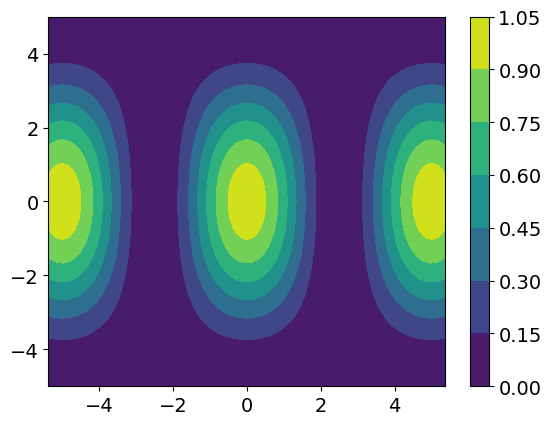

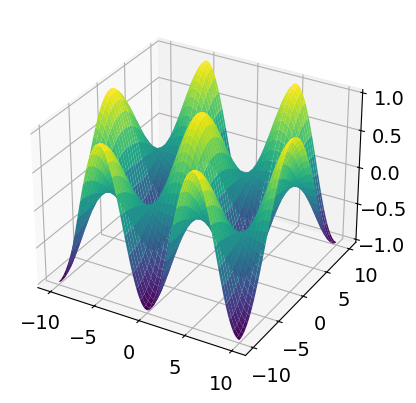

In [4]:
###ANSWER HERE
def Plot2d_help(xs,ys,Z,plot_3d=False):
    X, Y = np.meshgrid(xs, ys)
    Z = Z.reshape((len(xs),len(ys)))
    if plot_3d==True:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, Z, cmap='viridis')
        plt.show()
    else:
        plt.contourf(X, Y, Z, cmap='viridis')
        plt.axis('equal')
        plt.colorbar()
        plt.xlim(-5,5)
        plt.ylim(-5,5)
        plt.show()
    return

Plot2d = partial(Plot2d_help,xs,xs)
Plot2d(Psi,plot_3d=False)
Plot2d(np.abs(Psi)**2,plot_3d=False)
Plot2d(Psi,plot_3d=True)

Since phi_a and phi_b are independent, the contour plot of amplitude shows phi_a and phi_b follows indepdent osicilation, leading to periodic contours. The positive and negative regions indicate phase variations in the wavefunction. The probabiliity contour plot determines the likelihood of finding one particle at x1 and another at x2, the region of highest prbobiliity appears where abs(phi_a) and abs(phi_b) is maximized.

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

### b.  The Simple Harmonic Oscillator: Non-interacting wave-functions

We are going to work with two particles in the simple Harmonic oscillator.   We know that the Hamiltonian for a single particle in a Harmonic oscillator is

$$
H^\textrm{SHO}(x) = -\frac{1}{2}\frac{\partial^2}{\partial x^2} + \frac{1}{2} x^2
$$

and then the Hamiltonian for two non-interacting particles is

$$
H_0 = H^\textrm{SHO}(x_1) + H^\textrm{SHO}(x_2)
$$

Our first goal will be to work with just $H^\textrm{SHO}(x)$ (the one particle Hamiltonian) and build the eigenstates and eigenvalues.  

It will be convenient to represent everything inside a class:

```
class SHO:
   def __init__(self):
        self.xs = np.linspace(-L/2,L/2,200)
        self.delta_x=self.xs[1]-self.xs[0]
        self.Build_H_SHO()
        self.evals_oneParticle,self.evecs_oneParticle=np.linalg.eigh(self.H_SHO)
        self.oneParticleStates=len(self.evals_oneParticle)
        self.V = self.Interaction()
    def Build_H_SHO(self):
        # set up the H^SHO matrix and get the eigenvalues
        #### do stuff
        self.H_SHO=# the H you built.
    def Interaction(self):
        pass

```
which we can initialize with

```
H=SHO()
```

The only big difference with working in a class is that to access the variables of the class (and the functions) we need to prepend `self.` to everything that is local within the class (but not to variables that are local within a function)

You now need to write `Build_H_SHO(self)` which should build the Hamiltonian for the single particle eigenstates. To do this:

* Because our grid is length 200, initialize a zero matrix the size of the grid - i.e. `H0_oneParticle=np.zeros((200,200))`
* Loop `i` over the 200 elements of your grid:
    * On the diagonal  (`H0_oneParticle[i,i]`) put the potential (`0.5*self.xs[i]**2`).
    * Recalling that the stencil for the second derivative $(-1/2) \partial^2/\partial x^2$ is $1/2 (2 f(x)  - f(x+\delta) - f(x-\delta))/\delta^2$ also add $0.5 \times 2/\delta^2$ to the diagonal
    * Because of the second derivative stencil also put $0.5 \times (-1/\delta^2)$ on the element right above and below the diagonal - i.e. `H0_oneParticle[i+1,i]` and `H0_oneParticle[i,i+1]`

Once you write the full one-particle Hamiltonian notice that the `__init__` function should then diagonalize it.    This means that if you call
`H.evecs_oneParticle[:,i]` you should get the i'th eigenstate of the one-particle Harmonic oscillator.  

Go ahead and plot (in one dimension) the lowest two eigenstates and make sure that they are correct (i.e. what you know the lowest eigenstates of the Harmonic oscillator are).  You can plot with `plt.plot(H.xs,H.evecs_oneParticle[:,0])`.  Also verify that the two lowest eigenenergies (i.e `H0.evals_oneParticle[0]` for the lowest energy) are correct.





<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

0.4996841517587535 1.4984199579274973


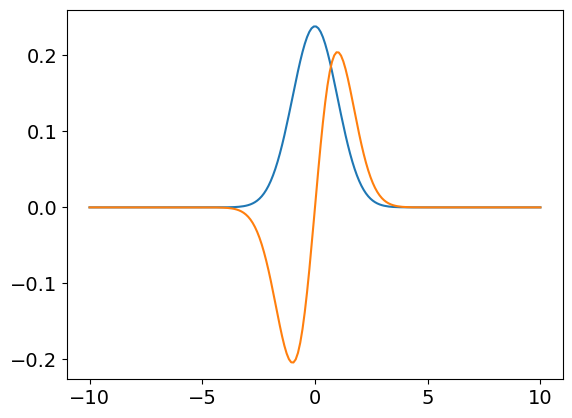

In [20]:
###ANSWER HERE
class SHO:
    def __init__(self):
        self.xs = np.linspace(-L/2, L/2, 200)
        self.delta_x = self.xs[1] - self.xs[0]
        self.Build_H_SHO()
        self.evals_oneParticle, self.evecs_oneParticle = np.linalg.eigh(self.H_SHO)
        self.oneParticleStates = len(self.evals_oneParticle)
        self.V = self.Interaction()

    def Build_H_SHO(self):
        # Initialize the Hamiltonian matrix
        H0_oneParticle = np.zeros((200, 200))

        for i in range(200):
            H0_oneParticle[i, i] = 0.5 * self.xs[i]**2 + 0.5 * 2 / self.delta_x**2
            if i < 199:
                H0_oneParticle[i+1, i] = -0.5 / self.delta_x**2
                H0_oneParticle[i, i+1] = -0.5 / self.delta_x**2

        self.H_SHO = H0_oneParticle

    def Interaction(self):
        pass

H0 = SHO()

for i in range(2):
    plt.plot(H0.xs, H0.evecs_oneParticle[:, i])

print(H0.evals_oneParticle[0], H0.evals_oneParticle[1])

H0.evals_oneParticle[0] should be approximately 0.5, and H0.evals_oneParticle[1] should be approximately 1.5, matching the expected analytical values.

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

### c.  Two Particle Non-interacting Eigenstates

Now that you have the single particle non-interacting eigenstates, we need to be able to get the two-particle non-interacting eigenstates using `np.kron`.  

Add a function to your class `get_eigenstate(self,n)`  so that when you call `H0.get_eigenstate(4)` it returns the fourth eigenstate of the non-interacting problem.  The $n$'th eigenstate of the non-interacting Harmonic oscillator should be

$$
\Psi_{n}(x_1,x_2) = \phi_{n//200}(x_1) \phi_{n \% 200}(x_2)
$$

where $\phi_i$ is the $i$'th eigenstate of the non-interacting Harmonic oscillator that you've already stored in `self.evecs_oneParticle`.
Note on the indexing: in the vector of $\Psi_{n}(x_1,x_2)$, eigenstates are not ordered by energy, given how we construct the two-particle wavefunction: $\Psi_0 = \phi_0 \phi_0$, $\Psi_1 = \phi_0 \phi_1$, ..., $\Psi_{199} = \phi_0 \phi_{199}$, $\Psi_{200} = \phi_1 \phi_0$, ..., $\Psi_{200 \times 200 - 1} = \phi_{199} \phi_{199}$.

Also write a function `get_eigenvalue(self,n)` which returns the $n'$th eigenvalue (recalling that the eigenvalue of the problem is just the sum of the one-particle eigenstates).

(These eigenvectors and eigenvalues won't be ordered by energy.  This is ok)
Also write a function `get_eigenvalue(self,n)` which returns the $n'$th eigenvalue (recalling that the eigenvalue of the problem is just the sum of the one-particle eigenstates).

Check that the first couple eigenvalues `H.get_eigenvalue(0), H.get_eigenvalue(1)` are correct.  Also plot your ground state `Plot2d(H.get_eigenstate(0)`.   Think about what it's telling you.


Go ahead and do this and then comment on the following thing about the ground state

* Is it symmetric - why or why not?
* Is it likely for the particles to be in the same place?
* Does one particles location depend on where the other particle is?


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

0.999368303517507 1.9981041096862509


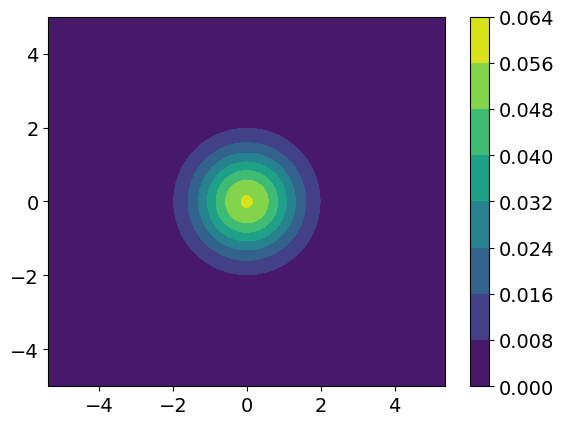

In [26]:
###ANSWER HERE
class SHO:
    def __init__(self):
        self.xs = np.linspace(-L/2, L/2, 200)
        self.delta_x = self.xs[1] - self.xs[0]
        self.Build_H_SHO()
        self.evals_oneParticle, self.evecs_oneParticle = np.linalg.eigh(self.H_SHO)
        self.oneParticleStates = len(self.evals_oneParticle)
        self.V = self.Interaction()

    def Build_H_SHO(self):
        # Initialize the Hamiltonian matrix
        H0_oneParticle = np.zeros((200, 200))

        for i in range(200):
            H0_oneParticle[i, i] = 0.5 * self.xs[i]**2 + 0.5 * 2 / self.delta_x**2
            if i < 199:
                H0_oneParticle[i+1, i] = -0.5 / self.delta_x**2
                H0_oneParticle[i, i+1] = -0.5 / self.delta_x**2

        self.H_SHO = H0_oneParticle

    def Interaction(self):
        pass
    def get_eigenstate(self, n):
        return np.kron(self.evecs_oneParticle[:, n // 200], self.evecs_oneParticle[:, n % 200])
    def get_eigenvalue(self, n):
        return self.evals_oneParticle[n // 200] + self.evals_oneParticle[n % 200]

H = SHO()
print(H.get_eigenvalue(0), H.get_eigenvalue(1))
Plot2d(H.get_eigenstate(0))

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

1. Yes, it is symmetric because the ground state phi_0 is symmetric.
2. Yes, since both particles are in the lowest-energy state has overlapped probability distribution.
3. No, because the total wavefunction is just a product of two independent single-particle wavefunctions. There is no interaction or correlation between their positions

###   d. The Interaction

Now we would like to understand what happens when we add an interaction between the two particles:  the two particles like to be apart and not touch each other.  Let us define a new interacting Hamiltonian


$$
H = H_0(x_1,x_2) + V(x_1,x_2)
$$

where the interaction between the two particles is

$$
V(x_1,x_2) = e^{-2(x_1-x_2)^2}
$$

will eventually be treated as a perturbation.

We now need to fill in the interaction piece of our Hamiltonian by writing the function `Interaction()` in our class which should generate the interaction and return a vector of length $200^2$ (this is the right size because it is telling us for each value of $x_1$ and $x_2$ what is $V(x_1,x_2)$).

It is easiest to create a $200 \times 200$ matrix where the rows represent the $x_1$ and the columns represent $x_2$.  Then we can resize it `V.resize(200**2)` to make it into the appropriate size vector.

To create the matrix, you can use `x_1,x_2=np.meshgrid(H.xs,H.xs)` to create matrices you need to subtract.  To understand what `meshgrid` has done, it's useful to plot them with

```
contour=plt.contour(H.xs,H.xs,x_1,levels=30,vmin=-10,vmax=10,cmap='hsv')
values=np.arange(-10,11)
cbar = plt.colorbar(contour)
cbar.set_ticks(values)
plt.show()
```
for both $x_1$ and $x_2$ to see what those two different matrices look like and then to plot
```
contour=plt.contour(H.xs,H.xs,x_1-x_2,levels=30,cmap='hsv')
plt.colorbar()
plt.show()
```
to plot what their difference looks like.

Once you've made `x_1-x_2` you can use this difference to make the full interaction (`np.exp` exponentiates and `**` is how you take things to a power).  Then you can resize it properly and return it from the function.

To check that everything is working go ahead and plot `Plot2d(H.V)` and understand if that's what you expected.
Comment on the result, comparing it to what you already know about the physics from the course.



<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

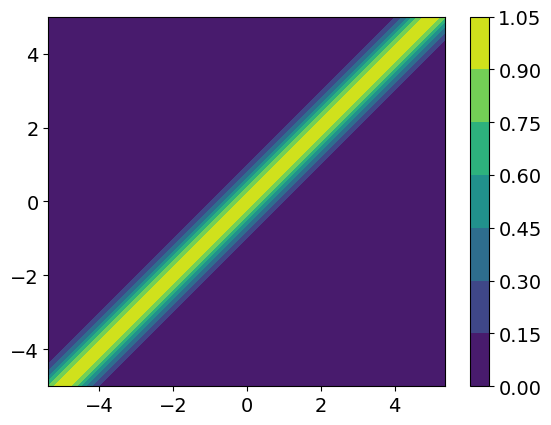

In [5]:
###ANSWER HERE
class SHO:
    def __init__(self):
        self.xs = np.linspace(-L/2, L/2, 200)
        self.delta_x = self.xs[1] - self.xs[0]
        self.Build_H_SHO()
        self.evals_oneParticle, self.evecs_oneParticle = np.linalg.eigh(self.H_SHO)
        self.oneParticleStates = len(self.evals_oneParticle)
        self.V = self.Interaction()

    def Build_H_SHO(self):
        # Initialize the Hamiltonian matrix
        H0_oneParticle = np.zeros((200, 200))

        for i in range(200):
            H0_oneParticle[i, i] = 0.5 * self.xs[i]**2 + 0.5 * 2 / self.delta_x**2
            if i < 199:
                H0_oneParticle[i+1, i] = -0.5 / self.delta_x**2
                H0_oneParticle[i, i+1] = -0.5 / self.delta_x**2

        self.H_SHO = H0_oneParticle

    def Interaction(self):
        x_1, x_2 = np.meshgrid(self.xs, self.xs)
        V = np.exp(-2 * (x_1 - x_2)**2)
        V.resize(200**2)
        return V
    def get_eigenstate(self, n):
        return np.kron(self.evecs_oneParticle[:, n // 200], self.evecs_oneParticle[:, n % 200])
    def get_eigenvalue(self, n):
        return self.evals_oneParticle[n // 200] + self.evals_oneParticle[n % 200]

H = SHO()
Plot2d(H.V)

This plot shows when x1= x2, the value of V is 1, this is correct because when x1=x2, V = 1. When x1 and x2 are far apart, V approaches zero because the interaction becomes small as distance between x1 and x2 increases.

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

### e. First order correction to the energy

We are now ready to put everything together to get our first order correction to the energy.

Let us write a function `FirstOrderEnergy(H)` which takes the Hamiltonian and return the first order correction `E1` which is

$$
E_1 = \langle n^{(0)} | V | n^{(0)} \rangle
$$

where $|n^{(0)}\rangle$ is the ground state wave-function of $H_0$.

Naively you might want to compute this by turning $V$ into a $200^2 \times 200^2$ matrix with the potential down the diagonal.  While correct, this will cause your computer to run out of RAM and crash.  Instead you can compute $\langle n^{(0)}| V$ by doing  `np.multiply(H.get_eigenstate(0).conjugate(),H.V)`.  This is much more efficient because it scales linearly with the size of the potential.  


Report $E_1$ and $E_0+E_1$.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [34]:
###ANSWER HERE
def FirstOrderEnergy(H):
    E1 = np.dot(H.get_eigenstate(0).conjugate(), np.multiply(H.get_eigenstate(0).conjugate(), H.V))
    E0 = H.get_eigenvalue(0)
    return E1, E0 + E1

E1, E0_plus_E1 = FirstOrderEnergy(H)
print(E1, E0_plus_E1)

0.44746252508164075 1.4468308285991478


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### f. First order correction to the wave-function

The first order correction to the wave-function is

$$
|n^{(1)} \rangle = \sum_{k \neq n} \frac{\langle k^{(0)} | V  | n^{(0)} \rangle }{E_n^0 - E_k^0} |k^{(0)}\rangle
$$

Go ahead and write a function `FirstOrderWaveFunction(H)` which returns the  correction `n1`.  You will have to loop over the number of eigenstates `H.numStates` and add on the appropraite term.  Remember to use `@` to do matrix multiplication and `*` to multiply a scalar times a vector (which will be needed when you multiply everything else by $|k^{(0)}\rangle$).  This should be a $200^2$ vector.   Make a 2d plot both of `n1` (which tells you how the correction is made) and `n0+n1` (which tells you what the new wave-function looks like).  What is this telling about how the perturbation is changing the wave-function?


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

/usr/local/lib/python3.11/dist-packages/matplotlib/contour.py:1371: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
/usr/local/lib/python3.11/dist-packages/matplotlib/contour.py:1372: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
/usr/local/lib/python3.11/dist-packages/numpy/ma/core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


200


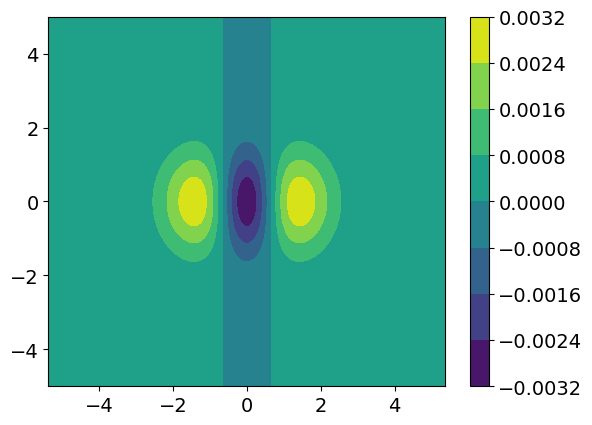

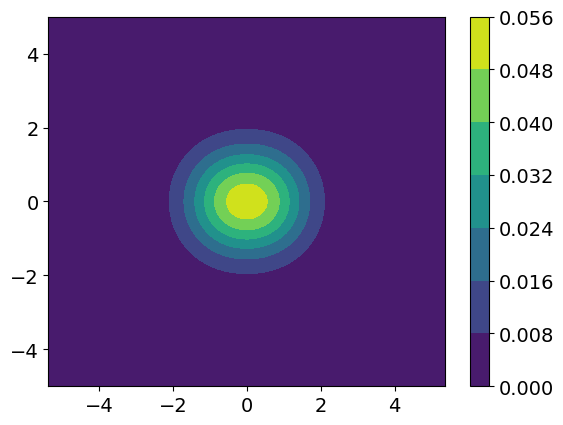

In [8]:
###ANSWER HERE
H.numStates = H.oneParticleStates
print(H.numStates)
def FirstOrderWaveFunction(H):
    n = 0  #ground state
    n0 = H.get_eigenstate(n)  # Unperturbed ground state
    E_n0 = H.get_eigenvalue(n)

    n1 = np.zeros(200**2, dtype=complex)

    for k in range(H.numStates):
        if k != n:
            k0 = H.get_eigenstate(k)
            E_k0 = H.get_eigenvalue(k)
            matrix_element = k0.conjugate() @ (H.V * n0)
            n1 += (matrix_element / (E_n0 - E_k0)) * k0

    return n1
n1 = FirstOrderWaveFunction(H)
n0 = H.get_eigenstate(0)
Plot2d(n1)
Plot2d(n0 + n1)

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### g. Second order correction to the energy

There are two (equivalent) ways to get the energy to second order.  

Either you can do

$$
E_2 = \sum_{k \neq n} \frac{ |\langle k^{(0)} | V | n^{(0)} \rangle|^2}{E_n^{(0)}-E_k^{(0)}}
$$

which uses only the eigenstates from the 0'th order wave-function or

$$
\widetilde{E_2} = \langle n^{(1)} | V | n^{(0)}\rangle
$$

Write functions that compute the second order energy in both ways and verify that they are the same.



<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [10]:
def SecondOrderEnergy_Method1(H, n=0):
    n0 = H.get_eigenstate(n)
    E_n0 = H.get_eigenvalue(n)

    E_2 = 0.0

    for k in range(H.numStates):
        if k != n:
            k0 = H.get_eigenstate(k)
            E_k0 = H.get_eigenvalue(k)

            matrix_element = k0.conjugate() @ (H.V * n0)
            E_2 += (np.abs(matrix_element)**2) / (E_n0 - E_k0)

    return E_2

def SecondOrderEnergy_Method2(H, n=0):
    n0 = H.get_eigenstate(n)
    n1 = FirstOrderWaveFunction(H)
    E_2 = n1.conjugate() @ (H.V * n0)

    return E_2

def verify_equivalence(H, n=0):
    E_2_method1 = SecondOrderEnergy_Method1(H, n)
    E_2_method2 = SecondOrderEnergy_Method2(H, n)

    print(f"Method 1 (Sum formula): {E_2_method1}")
    print(f"Method 2 (First-order wavefunction): {E_2_method2}")
    print(f"Absolute difference: {np.abs(E_2_method1 - E_2_method2)}")
    print(f"Relative difference: {np.abs((E_2_method1 - E_2_method2)/E_2_method1) if E_2_method1 != 0 else 'N/A'}")

    if np.isclose(E_2_method1, E_2_method2, rtol=1e-5):
        print("The methods are equivalent within numerical precision.")
    else:
        print("The methods show discrepancies beyond expected numerical error.")

verify_equivalence(H)

Method 1 (Sum formula): -0.008557775435021198
Method 2 (First-order wavefunction): (-0.008557775435021203+0j)
Absolute difference: 5.204170427930421e-18
Relative difference: 6.081218731953709e-16
The methods are equivalent within numerical precision.


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### h. Exact Answer

Now we are going to try to get the exact answer.

To get the part of the Hamiltonian for the interaction we now do need to make a matrix where $V$ is on the diagonal. Before we were avoiding that because doing so would consume all our RAM. Now, we are going to generate it in a sparse matrix to avoid this problem by doing
```
V=scipy.sparse.diags(H.V)
```

Now we also need to get the Hamiltonian for the non-interacting piece.  We already have the one-particle Hamiltonian `H.H0`.  As we needed to do when we want from the one-particle wave-function to the two-particle wave-function, we need to take some kronecker products to get the two-particle Hamiltonian.  Formally this is $H^\textrm{SHO}\otimes I + I \otimes H^\textrm{SHO}$.  We can generate this in python in a sparse matrix by doing
```
H0_sparse=scipy.sparse.kronsum(H.H_SH0,H.H_SH0)
```

Now we can generate the full sparse matrix `H_sparse` by adding these two terms.

Now, using
```
e,v=scipy.sparse.linalg.eigsh(H_kron,k=4,which='SA')
```
you can get the ground state energy $E_0$ and the exact wavefunction $|\Psi\rangle $. Do this and report the eigenenergy as well as make a 2d plot of the true wave-function.  How does the plot compare against your first order perturbative correction?

Also plot
* Cumulative Energy as a function of perturbation order and the exact energy as a horizontal line on this plot
*  Difference between the exact energy and the cumulative perturbative energy (on a log scale)
* The absolute value of the pertubative correction $|E^{(i)}|$ as a function of perturbation order (on a log scale)




<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

Creating sparse matrices...
Solving for eigenvalues and eigenvectors...
Exact ground state energy: 1.3999806132798873
Unperturbed energy: 0.999368303517507
First-order energy correction: 0.44746252508164075
Second-order energy correction: -0.008557775435021198
Total perturbative energy: 1.4382730531641266
Exact energy: 1.3999806132798873
Energy difference: 0.03829243988423925


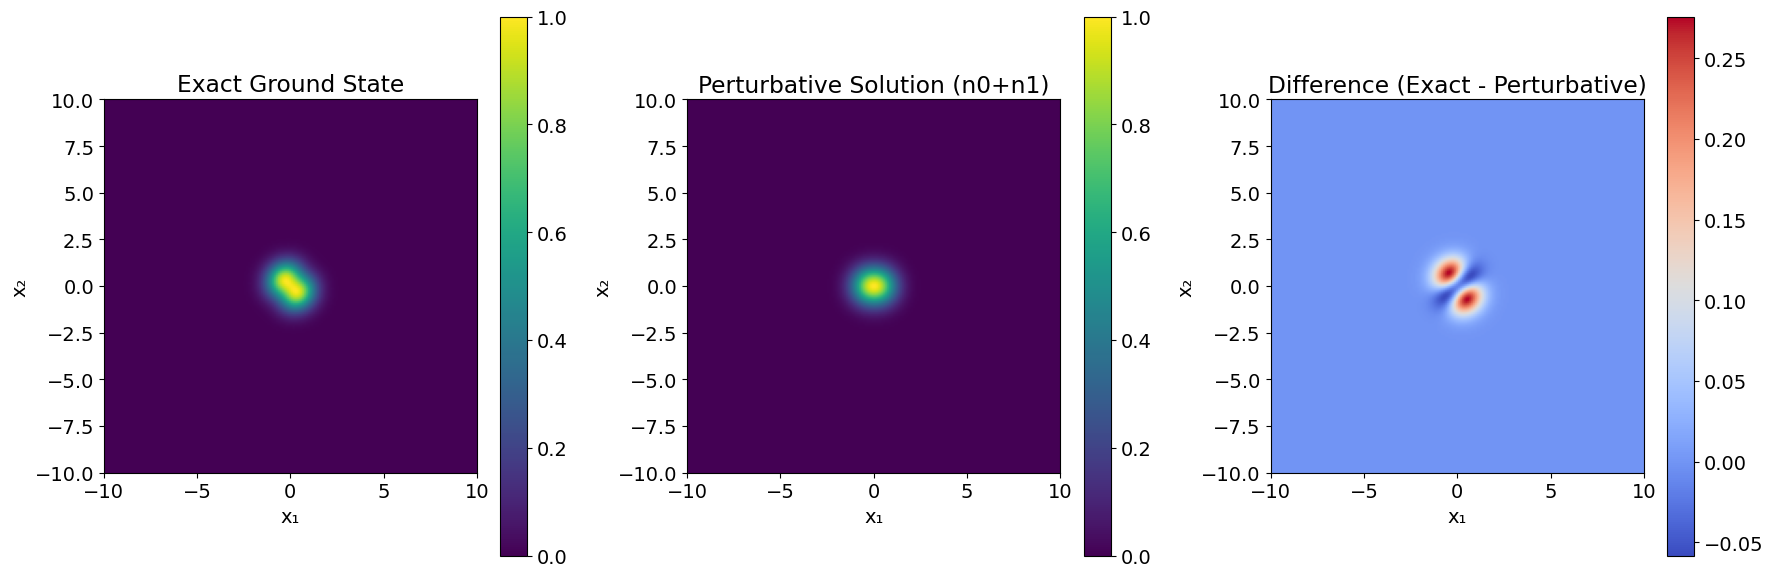


Comparison Analysis:
1. The exact solution shows the true ground state probability distribution
2. The perturbative solution (n0+n1) approximates this to first order
3. The difference plot highlights where perturbation theory is less accurate


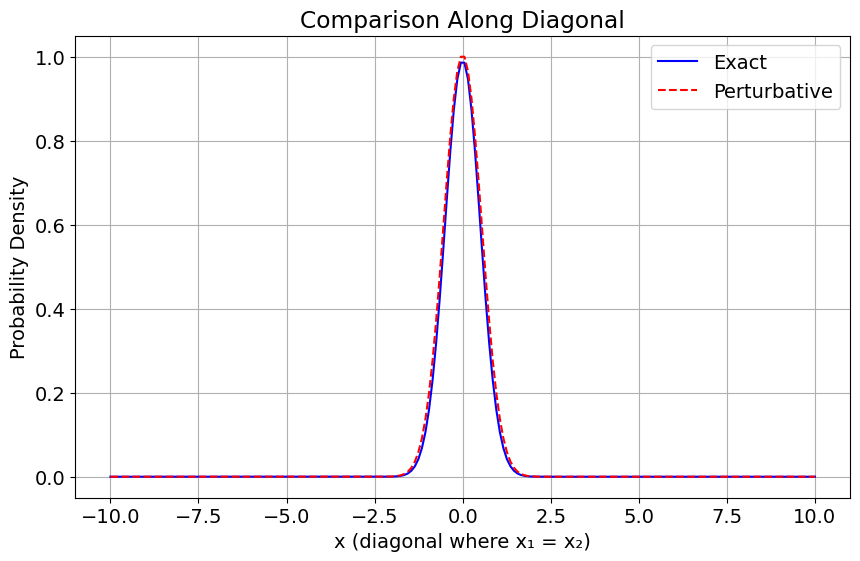

In [11]:
def calculate_exact_solution(H):
    V_sparse = scipy.sparse.diags(H.V)
    H0_sparse = scipy.sparse.kronsum(H.H_SHO, H.H_SHO)
    H_sparse = H0_sparse + V_sparse
    e, v = scipy.sparse.linalg.eigsh(H_sparse, k=4, which='SA')

    E0_exact = e[0]
    psi_exact = v[:, 0]

    print(f"Exact ground state energy: {E0_exact}")

    return E0_exact, psi_exact

def compare_with_perturbation(H):
    E0_exact, psi_exact = calculate_exact_solution(H)
    n0 = H.get_eigenstate(0)
    n1 = FirstOrderWaveFunction(H)
    psi_perturb = n0 + n1

    E0_unperturbed = H.get_eigenvalue(0)
    E1_perturbation = n0.conjugate() @ (H.V * n0)
    E2_perturbation = SecondOrderEnergy_Method1(H)
    E_perturb = E0_unperturbed + E1_perturbation + E2_perturbation

    print(f"Unperturbed energy: {E0_unperturbed}")
    print(f"1st order energy correction: {E1_perturbation}")
    print(f"2nd order energy correction: {E2_perturbation}")
    print(f"Total perturbative energy: {E_perturb}")
    print(f"Exact energy: {E0_exact}")
    print(f"Energy difference: {np.abs(E_perturb - E0_exact)}")

    plot_comparison(H, psi_exact, psi_perturb)

    return E0_exact, psi_exact, E_perturb, psi_perturb

def plot_comparison(H, psi_exact, psi_perturb):
    psi_exact_2d = np.abs(psi_exact.reshape(200, 200))**2
    psi_perturb_2d = np.abs(psi_perturb.reshape(200, 200))**2

    # Normalize if needed
    psi_exact_2d /= np.max(psi_exact_2d)
    psi_perturb_2d /= np.max(psi_perturb_2d)

    # Calculate difference
    diff_2d = psi_exact_2d - psi_perturb_2d

    # Create figure
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Plot exact solution
    im0 = axs[0].imshow(psi_exact_2d, extent=[H.xs[0], H.xs[-1], H.xs[0], H.xs[-1]], origin='lower', cmap='viridis')
    axs[0].set_title('Exact Ground State')
    axs[0].set_xlabel('x₁')
    axs[0].set_ylabel('x₂')
    fig.colorbar(im0, ax=axs[0])

    # Plot perturbative solution
    im1 = axs[1].imshow(psi_perturb_2d, extent=[H.xs[0], H.xs[-1], H.xs[0], H.xs[-1]], origin='lower', cmap='viridis')
    axs[1].set_title('Perturbative Solution (n0+n1)')
    axs[1].set_xlabel('x₁')
    axs[1].set_ylabel('x₂')
    fig.colorbar(im1, ax=axs[1])

    # Plot difference
    im2 = axs[2].imshow(diff_2d, extent=[H.xs[0], H.xs[-1], H.xs[0], H.xs[-1]], origin='lower', cmap='coolwarm')
    axs[2].set_title('Difference (Exact - Perturbative)')
    axs[2].set_xlabel('x₁')
    axs[2].set_ylabel('x₂')
    fig.colorbar(im2, ax=axs[2])

    plt.tight_layout()
    plt.show()

    # Analysis
    print("\nComparison Analysis:")
    print("1. The exact solution shows the true ground state probability distribution")
    print("2. The perturbative solution (n0+n1) approximates this to first order")
    print("3. The difference plot highlights where perturbation theory is less accurate")

    # Diagonal slices for closer comparison
    diagonal_indices = np.arange(200)
    exact_diagonal = np.diag(psi_exact_2d)
    perturb_diagonal = np.diag(psi_perturb_2d)

    plt.figure(figsize=(10, 6))
    plt.plot(H.xs, exact_diagonal, 'b-', label='Exact')
    plt.plot(H.xs, perturb_diagonal, 'r--', label='Perturbative')
    plt.xlabel('x (diagonal where x₁ = x₂)')
    plt.ylabel('Probability Density')
    plt.title('Comparison Along Diagonal')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
E0_exact, psi_exact, E_perturb, psi_perturb = compare_with_perturbation(H)

In [1]:
###ANSWER HERE
V = scipy.sparse.diags(H.V)
H0_sparse = scipy.sparse.kronsum(H.H_SHO, scipy.sparse.identity(200))
H_sparse = scipy.sparse.kronsum(H0_sparse, V) + scipy.sparse.kronsum(scipy.sparse.identity(200), H0_sparse)
e,v = scipy.sparse.linalg.eigsh(H_sparse, k=4, which='SA')
print(e)
Plot2d(v[:,0])

NameError: name 'scipy' is not defined

In [ ]:
###ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

### i. Higher order corrections to the energy  (*optional*)

**This exercise is optional**

In a large majority of cases, if you're using perturbation theory it's only out to second order in the energy.  Nonetheless, you can go to higher order in perturbation theory and (depending on the convergence of the series) get better results.  There's a separate question in what cases, it is easy to do so with limited computer time.  In this situation, let's not worry too much about that and just compute the perturbative corrections out to 30'th order.

To get the k'th order correction to the wave-function you can do

$$
|n^{(m)}\rangle = \sum_{j \neq n} \frac{1}{E_0^{(0)}-E_j^{(0)}} |j\rangle  \left( - \langle j^{(0)} | V | n^{(k-1)}\rangle  + \sum_{k=1}^{m-1} E^{(k)} \langle j^{(0)} | n^{(m-k)}\rangle \right)
$$

and then use

$$
E_0^{(m+1)}=\langle n^{(0)} | V | n^{(m)}\rangle
$$

You can iterate these equations over and over again until you reach any arbitrary order in perturbation theory.

 Use this to get the corrected energy out to 30'th order in perturbation theory..

 Store your energies in wave-functions in an array `Psis` and `Es` respectively (including the orders you'e already computed).  Plot the 2d version of the 30'th order wave-function and plot the same plots with respect to the energy that you've plotted aboe.


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
###ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

## Printing as PDF

Hopefully just printing to pdf creates a nice version of your document to submit.

If that is not the case, here is a robust albeit somewhat complicated solution that has worked in previous years:

Insert this snippet at the bottom of your notebook

``
from google.colab import drive
drive.mount('/content/drive')
``

Refresh your files tab (the folder icon on the left panel of the screen)

Paste this code at the end of your notebook, with the appropriate path

``
!jupyter nbconvert --to html "/content/drive/MyDrive/PathToAssignment/AssignmentName.ipynb"
``

This should generate an html file for your Jupyter notebook, which is saved in your drive.
Print this generated html file to a pdf file and submit it to canvas.